### 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# from wordcloud import WordCloud
import re
import hanja
from hanja import hangul
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import Kkma, Komoran, Okt, Hannanum #Mecab은 윈도우에서 작동 불가능
from wordcloud import WordCloud
from time import time

from konlpy import tag
from konlpy.corpus import kolaw
# from konlpy.utils import csvwrite, pprint

from nltk.tokenize import sent_tokenize


ModuleNotFoundError: ignored

In [ ]:
Lyrics = pd.read_csv('./Lyrics.csv',encoding='cp949')
Lyrics = pd.DataFrame(Lyrics)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(Lyrics)
text_seq = tokenizer.texts_to_sequences(Lyrics)

pd.set_option('display.max_seq_items', 10000)
pd.set_option('display.max_row', 10000)
pd.set_option('display.max_columns', 10000)

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
print(f'전체 학습 데이터 수: {len(Lyrics)}')

전체 학습 데이터 수: 200


In [ ]:
Lyrics['label'].value_counts()

0    50
1    50
3    50
2    50
Name: label, dtype: int64

In [ ]:
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()

In [ ]:
print(Lyrics['Lyrics'][0])

아침에 일어나 너에게 짧은 인사를 보낸다 아무리 멀리 떨어져 있어도 나는 널 생각하고 있어 늦은 밤 졸린 눈 비비며 너에게 편지를 쓸게 반가운 사진 속 그 표정만큼 아름다운 나날들이기를 찬 바람이 불어와 어깨가 움추러들 때에도 너를 떠올린다면 씩씩한 표정 할수있어 알고있니 넌 나의 두근대는 맘은 아직까지 여기에 언제까지나 좋아한단 말은 나를 웃음짓게 해 때로는 지쳐 울어도 우 우 우 우 눈을 감으니 꼭 곁에 있는것 같아쨘 하고 나타날게생각치 못한 어느 날우연히 문득 뒤돌아 봤을 때그때 꼭 내가 서 있을게꼭 하고 껴안을게 가장 반가운 얼굴로눈물이 왈칵 쏟아진다해도나는 환하게 웃을거야혹시 오늘 너에게서러운 일이 생긴다면오래 전 그 날처럼 달려가꼭 안아주고파아름답게 빛나길알고있니 넌 나의 두근대는 맘은 아직까지 여기에언제까지나 좋아한단 말은 나를 웃음짓게 해 때로는 지쳐 울어도 눈을 감으니 꼭 곁에 있는것 같아 기억해줘 넌 나의 보고싶은 사람 이만 줄일게 안녕번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나의 유일한 번호 나는 여전히 너를 사랑하고 있다 나의 번호 나의 번호


In [ ]:
# import textwrap
# data_list = []
# for i in Lyrics['Lyrics']:
#     result = textwrap.wrap(str(i))
#     data_list.append(result)
# print(data_list)


## 형태소/어간/명사 등 추출

In [ ]:
# for i in Lyrics['Lyrics']:
#     print(kkma.morphs(str(i)))

print("[Kkma morphs 함수]")
print(kkma.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Okt 함수]") # 그나마 제일 단어가 깨지지 않음
print(okt.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Komoran 함수]")
print(komoran.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Hannanum 함수]")
print(hannanum.morphs(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')

[Kkma morphs 함수]
['아침', '에', '일어', '나', '너', '에게', '짧', '은', '인사', '를', '보내', 'ㄴ다', '아무리', '멀리', '떨어지', '어', '있', '어도', '나', '는', '넣', 'ㄹ', '생각', '하', '고', '있', '어', '늦', '은', '밤', '졸리', 'ㄴ', '눈', '비비', '며', '너', '에게', '편지', '를', '쓸', '게', '반갑', 'ㄴ', '사진', '속', '그', '표정', '만큼', '아름답', 'ㄴ', '나날', '들', '이', '기르', 'ㄹ', '찬', '바람', '이', '불어오', '아', '어깨', '가', '움추러들', 'ㄹ', '때', '에', '도', '너', '를', '떠올리', 'ㄴ다면', '씩씩', '하', 'ㄴ', '표정', '하', 'ㄹ', '수', '있', '어', '알', '고', '있', '니', '너', '는', '나의', '두근대', '는', '맘', '은', '아직', '까', '지', '여기', '에', '언제', '까지', '나', '좋아하', 'ㄴ단', '말', '은', '나르', 'ㄹ', '웃음', '짓', '게', '하', '어', '때로는', '지치', '어', '울', '어도', '우', '우', '우', '우', '눈', '을', '감', '으니', '꼭', '곁', '에', '있', '는', '것', '같', '아', '쨘', '하', '고', '나타나', 'ㄹ', '것', '이', '생각', '하', '지', '못하', 'ㄴ', '어느', '날', '우연히', '문득', '뒤돌', '아', '보', '았', '을', '때', '그때', '꼭', '나', '가', '스', '어', '있', '을게', '꼭', '하', '고', '껴안', '을', '것', '이', '가장', '반갑', 'ㄴ', '얼굴', '로', '눈물', '이', '왈칵', '쏟아지', 'ㄴ다', '하', '어도', '나', '

In [ ]:
#명사만 추출

print("[Kkma nouns 함수]")
print(kkma.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[OKt nouns 함수]") # 제일 잘 표현
print(okt.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Komoran nouns 함수]")
print(komoran.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')
print("[Hannanum nouns 함수]")
print(hannanum.nouns(str(Lyrics['Lyrics'][0])))
print('-------------------------------------------------------------------')

[Kkma nouns 함수]
['아침', '일어', '너', '인사', '나', '생각', '밤', '눈', '편지', '사진', '속', '표정', '나날', '찬', '바람', '어깨', '때', '수', '나의', '맘', '여기', '언제', '말', '웃음', '우', '곁', '쨘', '날', '때그때', '그때', '얼굴', '눈물', '거', '오늘', '일', '전', '가꼭', '기억', '사람', '안녕', '안녕번호', '번호', '유일한', '사랑']
-------------------------------------------------------------------
[OKt nouns 함수]
['아침', '너', '인사', '멀리', '나', '널', '생각', '밤', '눈', '비비', '너', '편지', '사진', '속', '그', '표정', '나날', '이기', '찬', '바람', '어깨', '움', '때', '너', '표정', '넌', '나', '근대', '맘', '여기', '언제', '말', '웃음', '해', '때로는', '어도', '눈', '꼭', '곁', '같아쨘', '생각', '치', '못', '날', '문득', '뒤', '때', '그때', '꼭', '내', '꼭', '가장', '얼굴', '눈물', '왈칵', '도나', '혹시', '오늘', '너', '전', '그', '날', '꼭', '넌', '나', '근대', '맘', '여기', '언제', '말', '웃음', '해', '때로는', '어도', '눈', '꼭', '곁', '기억', '넌', '나', '사람', '안녕', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '번호', '나', '너', '사랑', '나', '번호', '나', '번호']
-----------------------------------------------------

## 불용어 제거 방법

In [162]:
def preprocessing(lyric,okt,remove_stopwords=False,stop_words=[]):
    text=re.sub('[^가-힣a-zA-Zㄱ-ㅎㅏ-ㅣ\\s]',' ',lyric) #200번째 가사

    lyric_word=okt.morphs(text,stem=True)
    # ㄴ 단어를 더 정확하게 나눌 수 있는 방법이 있다면 적용하기 (형태소-morphs/명사-nouns)
    
    if remove_stopwords:
        lyric_word=[token for token in lyric_word if not token in stop_words]
    
    return lyric_word

stop_words=['예컨대','하면','아니거든','어찌하든지','같다','비슷하다',
'에게','하고','를','은','는','이','가','하','아','것','들','을','끼',
'의','있','되','수','보','주','등','으로','에','서','로',
'도','에서','있다','하다','와','되다','과','보다','이','있','하','것','들','그',
'되','수','이','보','않','없','나','사람','주','아니','등','같','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두',
'말하','알','그러나','받','못하','일','그런','또','더','많','그리고','좋','크','따르','중','나오',
'가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','안','어떤','내','내','경우','명',
'다시','이런','앞','보이','번','나','다른','어떻','개','전','들','사실','이렇','점','싶','말','정도','좀',
'원','잘','통하','놓','우','이기','며','어도','이만','이기','만큼','들다','에도','랄랄','랄','랄라','라라','워','우','어',
'라라라','나나','우후','휴','후','우우','만','게','아무','없이이','래','래그','엔','선','라라',
'면','딱','까지는','거기','대다','이나','않다','이다','대다','다나','고','다','듯',
'랑','뿐','이야','테','니','에는','해도','거야','에도','거','라고','걸','째','인','죠',
'없다','라이트']
# ㄴ 불용어 사전 업데이트 필요
# 시간, 그녀, 생각, 소리, 우리, 여자, 자신, 사회, 문제 => 키워드는 포함 x

okt=Okt()

clean_train_happy =[]

# 0 행복
for lyric in Lyrics['Lyrics'].loc[:49]:
    if type(lyric)==str:
        clean_train_happy.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        clean_train_happy.append([])


print(len(clean_train_happy))
print(clean_train_happy[:])


print('----------------------------------------------------------------')
# 1 슬픔

clean_train_sad =[]
for lyric in Lyrics['Lyrics'].loc[50:99]:
    if type(lyric)==str:
        clean_train_sad.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        clean_train_sad.append([])


print(len(clean_train_sad))
print(clean_train_sad[:])




50
[['아침', '일어나다', '너', '짧다', '인사', '보내다', '아무리', '멀리', '떨어지다', '널', '생각', '늦다', '밤', '졸리다', '눈', '비비', '너', '편지', '쓸다', '반갑다', '사진', '표정', '아름답다', '나날', '찬', '바람', '불어오다', '어깨', '움', '추다', '너', '떠올리다', '씩씩하다', '표정', '알다', '넌', '근대', '맘', '아직', '까지', '여기', '언제', '까지나', '좋아하다', '나르다', '웃음', '짓다', '해', '때로는', '지치다', '울', '눈', '감다', '꼭', '곁', '같아쨘', '나타나다', '생각', '치', '못', '어느', '날', '우연히', '문득', '뒤', '돌다', '그때', '꼭', '서다', '꼭', '끼다', '가장', '반갑다', '얼굴', '눈물', '왈칵', '쏟아지다', '도나', '환하다', '웃다', '혹시', '오늘', '너', '서럽다', '일이', '생기다', '오래', '날', '처럼', '달려가다', '꼭', '안다', '고프다', '아름답다', '빛나다', '알다', '넌', '근대', '맘', '아직', '까지', '여기', '언제', '까지나', '좋아하다', '나르다', '웃음', '짓다', '해', '때로는', '지치다', '울', '눈', '감다', '꼭', '곁', '기억', '해주다', '넌', '줄이다', '안녕', '번호', '유일하다', '번호', '유일하다', '번호', '유일하다', '번호', '유일하다', '번호', '유일하다', '번호', '유일하다', '번호', '유일하다', '번호', '유일하다', '번호', '유일하다', '번호', '여전하다', '너', '사랑', '번호', '번호'], ['너', '맛있다', '살구', '빛', '샐러드', '맛있다', '먹다', '싶다', '너', '좋아하다', '자그마하다', '행복', '달력', '기념일', 

In [163]:
print('----------------------------------------------------------------')
# 2 분노

clean_train_anger =[]
for lyric in Lyrics['Lyrics'].loc[100:149]:
    if type(lyric)==str:
        clean_train_anger.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        clean_train_anger.append([])


print(len(clean_train_anger))
print('분노 : ', clean_train_anger[:])

print('----------------------------------------------------------------')
# 3 희망

clean_train_hope =[]
for lyric in Lyrics['Lyrics'].loc[150:]:
    if type(lyric)==str:
        clean_train_hope.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        clean_train_hope.append([])


print(len(clean_train_hope))
print('희망 :', clean_train_hope[:])

----------------------------------------------------------------
50
분노 :  [['환호', '기대', '첫', '등장', '남', '차별', '화', '순간', '나가다', '문', '넌', '넋', '나가다', '돼다', '꼬마', '재롱', '잔치', '멈추다', '분위기', '벌써', '무르', '익다', '순식간', '객석', '정복', '카펫', '깔다', '헹가래', '받다', '터지다', '박차', '가해', '벌', '세다', '울다', '웽웽무대', '떠나가다', '비명', '지르다', '땍땍', '아무나', '데리다', '오시', '마음', '키', '대로', '움직이다', '시간', '돼다', '정적', '깨우다', '적당하다', '생각', '버리다', '엄지', '세우다', '열기', '불', '태우다', '구역', '미치다', '놈', '모이다', '나오다', '치다', '간다', '조', '조여', '들어가다', '나오다', '치다', '들어가다', '나오다', '치다', '간다', '조', '조여', '들어가다', '나오다', '치다', '들어가다', '폭주', '일곱', '악당', '빨갛다', '불로', '못', '막다', '밑', '주목', '전방', '힘차다', '함성', '발사', '너', '똥', '폼', '잡다', '손', '벌', '받다', '듯이', '단합', '해', '벌', '세다', '울다', '웽웽무대', '떠나가다', '비명', '지르다', '땍땍', '꽃미남', '기르다', '써다', '세다', '척', '너무', '귀엽다', '깽판', '부리다', '개판', '분전', '이렇다', '컨셉', '우리', '전문', '시간', '돼다', '정적', '깨우다', '적당하다', '생각', '갖다', '버리다', '엄지', '세우다', '열기', '불', '태우다', '구역', '미치다', '놈', '모이다', 'Guess', 'Whos', 'back', 'Ay

#wordcloud 시각화

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


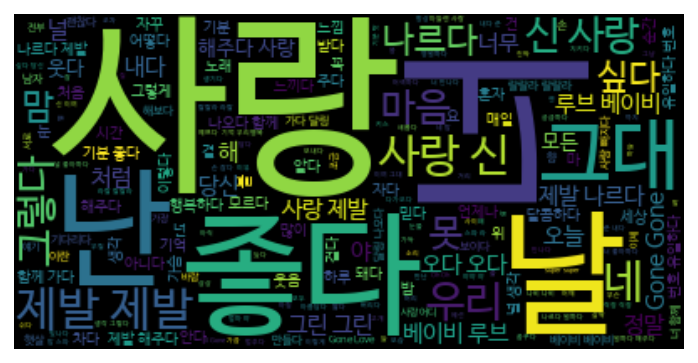

In [164]:
#wordcloud 시각화

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = 'C:/Windows/Fonts/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

wordcloud_happy = sum(clean_train_happy, []) # 행복 가사 예시
wordcloud_sad = sum(clean_train_sad, [])
wordcloud_anger = sum(clean_train_anger, [])
wordcloud_hope = sum(clean_train_hope, [])

# 행복 
wordcloud_0 = WordCloud(font_path='C:/Windows/Fonts/NanumBarunGothic.ttf').generate(' '.join(wordcloud_happy))
plt.imshow(wordcloud_0,interpolation='bilinear')
plt.axis('off')
plt.show()

In [182]:
happy_train, happy_test = train_test_split(clean_train_happy, test_size=0.2, shuffle=True, random_state=111, stratify=Lyrics['label'].loc[:49])

len(happy_train), len(happy_test)

(40, 10)

In [183]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_happy)
train_sequences = tokenizer.texts_to_sequences(clean_train_happy)
test_sequences = tokenizer.texts_to_sequences(clean_train_happy)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(happy_train['vec'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(happy_test['vec'])

TypeError: ignored

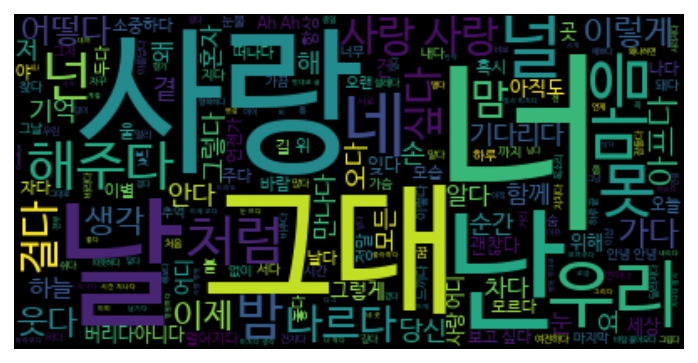

In [165]:
# 슬픔
wordcloud_1 = WordCloud(font_path='C:/Windows/Fonts/NanumBarunGothic.ttf').generate(' '.join(wordcloud_sad))
plt.imshow(wordcloud_1,interpolation='bilinear')
plt.axis('off')
plt.show()

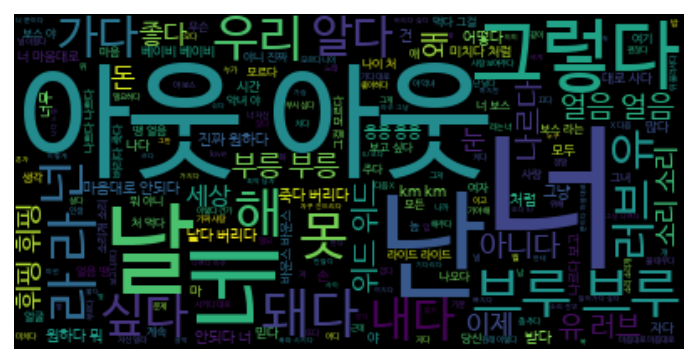

In [166]:
# 분노

wordcloud_2 = WordCloud(font_path='C:/Windows/Fonts/NanumBarunGothic.ttf').generate(' '.join(wordcloud_anger))
plt.imshow(wordcloud_2,interpolation='bilinear')
plt.axis('off')
plt.show()

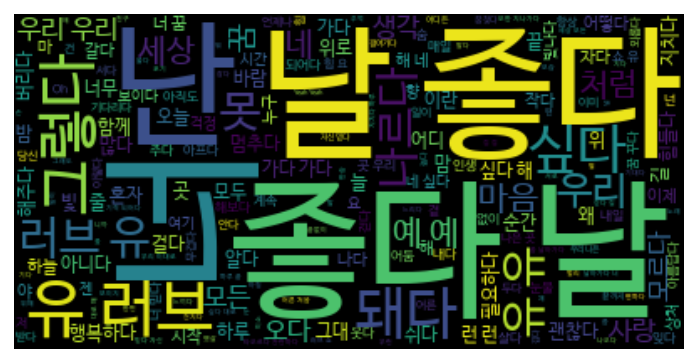

In [167]:
# 위로(희망)

wordcloud_3 = WordCloud(font_path='C:/Windows/Fonts/NanumBarunGothic.ttf').generate(' '.join(wordcloud_hope))
plt.imshow(wordcloud_3,interpolation='bilinear')
plt.axis('off')
plt.show()

In [170]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(clean_train_hope)
train_sequences=tokenizer.texts_to_sequences(clean_train_hope)
word_vocab=tokenizer.word_index
word_vocab

{'날': 1,
 '너': 2,
 '우리': 3,
 '좋다': 4,
 '유': 5,
 '싶다': 6,
 '난': 7,
 '가다': 8,
 '꿈': 9,
 '해': 10,
 '네': 11,
 '못': 12,
 '러브': 13,
 '그렇다': 14,
 '돼다': 15,
 '세상': 16,
 '나르다': 17,
 '길': 18,
 '마음': 19,
 '곳': 20,
 '끝': 21,
 '하루': 22,
 '혼자': 23,
 '모든': 24,
 '괜찮다': 25,
 '예': 26,
 '믿다': 27,
 '버리다': 28,
 '힘들다': 29,
 '요': 30,
 '오다': 31,
 '힘': 32,
 '밤': 33,
 '순간': 34,
 '찾다': 35,
 '처럼': 36,
 '멈추다': 37,
 '어디': 38,
 '생각': 39,
 '행복하다': 40,
 '지치다': 41,
 '사랑': 42,
 '우린': 43,
 '모르다': 44,
 '시간': 45,
 '매일': 46,
 '그대': 47,
 '런': 48,
 '알다': 49,
 '바람': 50,
 '맘': 51,
 '함께': 52,
 '시작': 53,
 '아프다': 54,
 '오늘': 55,
 '겁': 56,
 '너무': 57,
 '이제': 58,
 '아니다': 59,
 '해주다': 60,
 '빛': 61,
 '널': 62,
 '걸다': 63,
 '걷다': 64,
 '되어다': 65,
 '하늘': 66,
 '쉬다': 67,
 '든': 68,
 '모두': 69,
 '야': 70,
 '젠': 71,
 '위로': 72,
 '여기': 73,
 '자다': 74,
 '마': 75,
 '늘': 76,
 '갈다': 77,
 '날아가다': 78,
 '필요하다': 79,
 '어른': 80,
 '위해': 81,
 '왜': 82,
 '많다': 83,
 '나은': 84,
 '까지': 85,
 '위': 86,
 '자': 87,
 '줄': 88,
 '기다': 89,
 '대로': 90,
 '이란': 91,
 '숨': 92,
 '삶': 93,

### koBERT


In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'
!pip install git+https://git@github.com/SKTBrain/KoBERT

In [133]:
import os
from zipfile import ZipFile
import torch
from transformers import BertModel
import gluonnlp as nlp

from kobert import download, get_tokenizer

def get_kobert_model(model_path, vocab_file, ctx="cpu"):
        bertmodel = BertModel.from_pretrained(model_path, return_dict=False)
        device = torch.device(ctx)
        bertmodel.to(device)
        bertmodel.eval()
        vocab_b_obj = nlp.vocab.BERTVocab.from_sentencepiece(
            vocab_file, padding_token="[PAD]"
        )
        return bertmodel, vocab_b_obj

In [134]:
from kobert_tokenizer import KoBERTTokenizer

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)

TypeError: ignored

In [126]:
tok = tokenizer.tokenize
data_train = BERTDataset(Lyrics_train, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(Lyrics_test,0, 1, tok, vocab,  max_len, True, False)

AttributeError: ignored

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel
# from transformers import AutoModel, AutoTokenizer

#GPU 사용 시
device = torch.device("cuda:0")

In [ ]:
# ★ Hugging Face를 통한 모델 및 토크나이저 Import
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

train_test_split

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer,vocab, max_len,
                 pad, pair):
   
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))
         

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5  
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [63]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split

Lyrics_train, Lyrics_test = train_test_split(Lyrics, test_size=0.2, shuffle=True, random_state=111, stratify=Lyrics['label'])

In [64]:
Lyrics_train['label'].value_counts()

3    40
0    40
2    40
1    40
Name: label, dtype: int64

In [ ]:
Lyrics_test['label'].value_counts()

3    10
1    10
2    10
0    10
Name: label, dtype: int64

In [104]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

NameError: ignored

In [ ]:
#koBERT 모델 구현

class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=7,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)
#BERT 모델 불러오기
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
 
#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 대표적인 loss func

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    
train_dataloader

In [ ]:
#train

train_history=[]
test_history=[]
loss_history=[]
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
         
        #print(label.shape,out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    #train_history.append(train_acc / (batch_id+1))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1))